In [1]:
include("/Users/meesvandartel/Desktop/LPR FinGrow/Reprod Paper/GrowthBasic.jl")
using .GrowthBasic
using Agents
using Plots
using HypothesisTests
using ProgressMeter

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


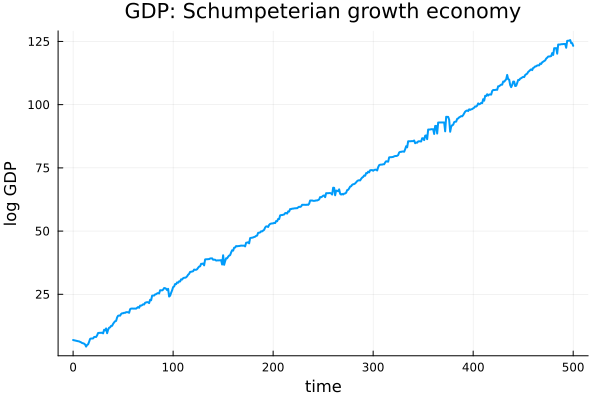

In [2]:
model1 = GrowthBasic.initialize_econ(;seed = 43)
GDP_series = []
dates = 0:500

@showprogress for t in dates

    GDP = 0
    for agent in allagents(model1)
        Q = agent.Q
        GDP += Q
    end
    push!(GDP_series, log(GDP))
    step!(model1)
end
GDP_series = convert(Vector{Float64}, GDP_series)

p = plot(dates, GDP_series,
    title="GDP: Schumpeterian growth economy", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)


# Display the plot
display(p)

In [3]:
ADFTest(GDP_series, :constant, 0)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -6.63581e-5

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.9533

Details:
    sample size in regression:          500
    number of lags:                     0
    ADF statistic:                      -0.0600428
    Critical values at 1%, 5%, and 10%: [-3.44347 -2.86733 -2.56985]
